# The U.S. economy is entering a period of fiscal uncertainty and elevated inflation risk. Characterized with record national debt, rising interest expenses, and structural budget deficits.

- The Investments Committee has recently emphasized concerns around fiscal stress, interest rate pressures, and the potential crowding-out effects on private investment. (as per the Macroeconomics sector's commentary)

- In this environment, understanding how inflation evolves—and how different markets respond under different inflationary regimes—is essential for informed portfolio risk management and sector allocation.

---
## We look first to choose the data we wish to use to classify these inflationary regimes.
- We'll look at factors like the following:
    - From FRED: 
        - Consumer Price Index
        - GDP
        - Unemployment rates

    - From Yahoo Finance:
        - Sector returns (ie from XLF, XLK, XLY)
        - Market returns (SPY)
        - Volatility (in sectors and in market)
    
    - From US Treasury:
        - Yield Curve Spreads (10 year to 2 year, 10 year to 3 month)
        - interest rates
        
We aim to analyze a broad spread of regimes so we will look at the time from 2000-present (march 1st 2025). This includes the dot com bubble burst, the 2008 Financial crisis, covid, as well as the current macro environment.

We will import this data, and begin to analyze it's effect. 

In [290]:
import pandas as pd
import numpy as np

# Import Macroeconomic Data Monthly Time Frame from 2000 Jan 1 to 2025 March 1 (from FRED)

# Consumer Price Index for All Urban Consumers: All Items (Not seasonally adjusted)
CPIAUCNS = pd.read_csv("CPIAUCNS.csv", parse_dates=["DATE"]) 
CPIAUCNS_monthly_change = CPIAUCNS.copy()
CPIAUCNS_monthly_change["CPIAUCNS"] = CPIAUCNS["CPIAUCNS"].pct_change(periods=1) # Monthly change in CPI
CPIAUCNS_monthly_change.iloc[0, 1] = 0 # Replace the NaN value with 0
CPIAUCNS_monthly_change["DATE"] = pd.to_datetime(CPIAUCNS_monthly_change["DATE"])
CPIAUCNS_monthly_change.set_index("DATE", inplace=True)

# Consumer Price Index for All Urban Consumers: All Items Less Food and Energy (Seasonally adjusted)
CPILFESL = pd.read_csv("CPILFESL.csv", parse_dates=["DATE"]) 
CPILFESL_monthly_change = CPILFESL.copy()
CPILFESL_monthly_change["CPILFESL"] = CPILFESL["CPILFESL"].pct_change(periods=1) # Monthly change in CPI
CPILFESL_monthly_change.iloc[0, 1] = 0 # Replace the NaN value with 0
CPILFESL_monthly_change["DATE"] = pd.to_datetime(CPILFESL_monthly_change["DATE"])
CPILFESL_monthly_change.set_index("DATE", inplace=True)

# Unemployment Rate
UNRATE = pd.read_csv("UNRATE.csv", parse_dates=["DATE"]) # Unemployment Rate
UNRATE_monthly_change = UNRATE.copy()
UNRATE_monthly_change["UNRATE"] = UNRATE["UNRATE"].pct_change(periods=1) # Monthly change in Unemployment Rate
UNRATE_monthly_change.iloc[0, 1] = 0 # Replace the NaN value with 0
UNRATE["DATE"] = pd.to_datetime(UNRATE["DATE"])
UNRATE.set_index("DATE", inplace=True)

# Real GDP (NOTE THAT THIS IS QUARTERLY AND STOPS IN 2024 Q4 (Oct 1))
GDP = pd.read_csv("GDPC1.csv", parse_dates=["DATE"]) # Real GDP
GDP_quarterly_change = GDP.copy()
GDP_quarterly_change["GDP"] = GDP["GDPC1"].pct_change(periods=1) # Quarterly change in GDP
GDP_quarterly_change.iloc[0, 1] = 0 # Replace the NaN value with 0
GDP["DATE"] = pd.to_datetime(GDP_quarterly_change["DATE"])
GDP.set_index("DATE", inplace=True)

# Fed Funds rate
FEDFUNDS = pd.read_csv("FEDFUNDS.csv", parse_dates=["DATE"])
FEDFUNDS["DATE"] = pd.to_datetime(FEDFUNDS["DATE"])
FEDFUNDS.set_index("DATE", inplace=True)


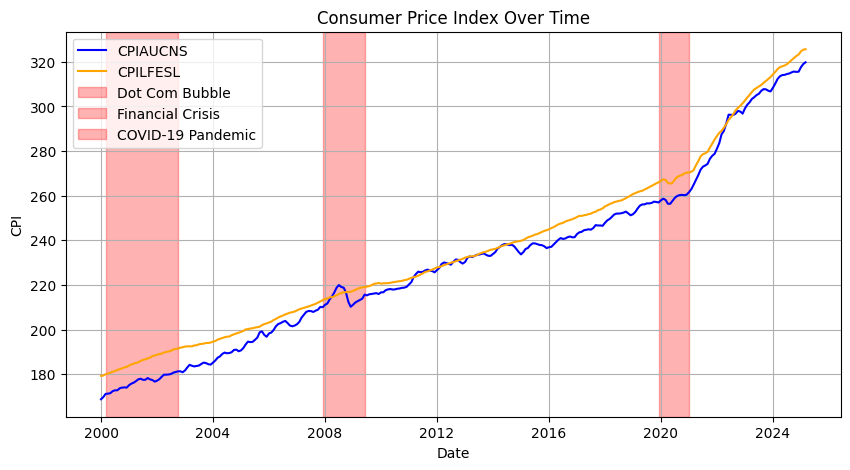

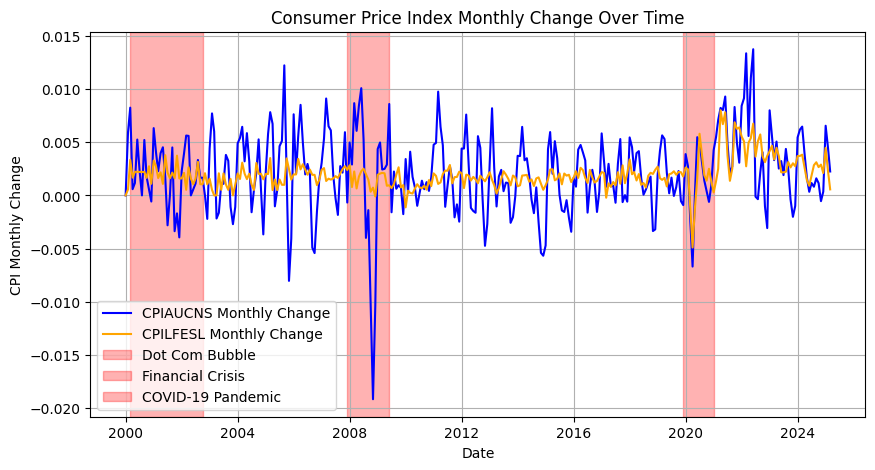

In [291]:
# Now that the data is imported, let's graph and notice some fundamental correlations.
# We'll also want to highlight important time periods, like the dot com bubble burst, the 2008 financial crisis, and covid

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

notable_date_ranges = {
    "Dot Com Bubble": ("2000-03-01", "2002-10-01"),
    "Financial Crisis": ("2007-12-01", "2009-06-01"),
    "COVID-19 Pandemic": ("2019-12-01", "2021-01-01")
}
# Plot the CPIs on the same graph
plt.figure(figsize=(10, 5))
plt.plot(CPIAUCNS["DATE"], CPIAUCNS["CPIAUCNS"], label="CPIAUCNS", color="blue")
plt.plot(CPILFESL["DATE"], CPILFESL["CPILFESL"], label="CPILFESL", color="orange")
# Highlight notable date ranges
for label, (start, end) in notable_date_ranges.items():
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.3, label=label)

plt.title("Consumer Price Index Over Time")
plt.xlabel("Date")
plt.ylabel("CPI")
plt.legend()
plt.grid()
plt.show()

# Then plot the change in CPIS
plt.figure(figsize=(10, 5))
plt.plot(CPIAUCNS_monthly_change.index, CPIAUCNS_monthly_change["CPIAUCNS"], label="CPIAUCNS Monthly Change", color="blue")
plt.plot(CPILFESL_monthly_change.index, CPILFESL_monthly_change["CPILFESL"], label="CPILFESL Monthly Change", color="orange")
# Highlight notable date ranges
for label, (start, end) in notable_date_ranges.items():
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.3, label=label)

plt.title("Consumer Price Index Monthly Change Over Time")
plt.xlabel("Date")
plt.ylabel("CPI Monthly Change")
plt.legend()
plt.grid()
plt.show()

### Notes on CPI over time.
- CPI Tends to dip during the recessions, due to the economic nature of them.
- Additionally, looking at the post-covid time frame tells us that CPI goes up during inflationary periods (ie stimulus checks)
- Seasonally adjusted (less food and energy) is much more robust, and shows smaller changes month over month.
- We can look for CPI having a low or negative change MoM as an indicator of recession-like regimes, but it is important that this change persists over several months, otherwise the change is likely just noise.

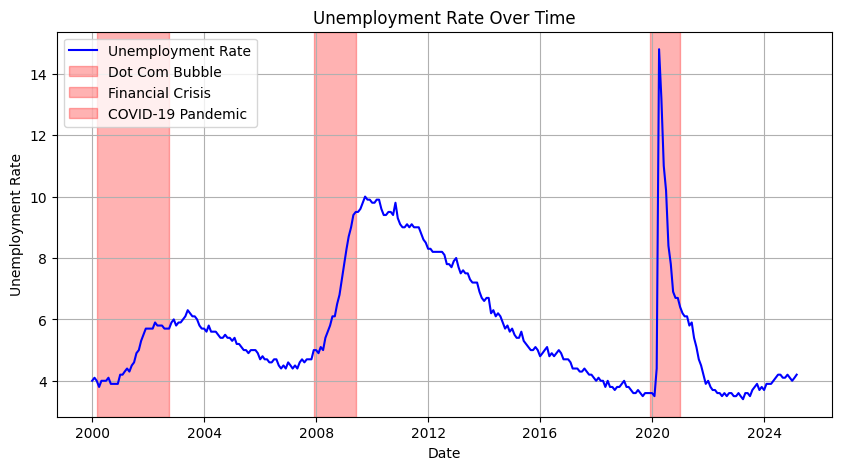

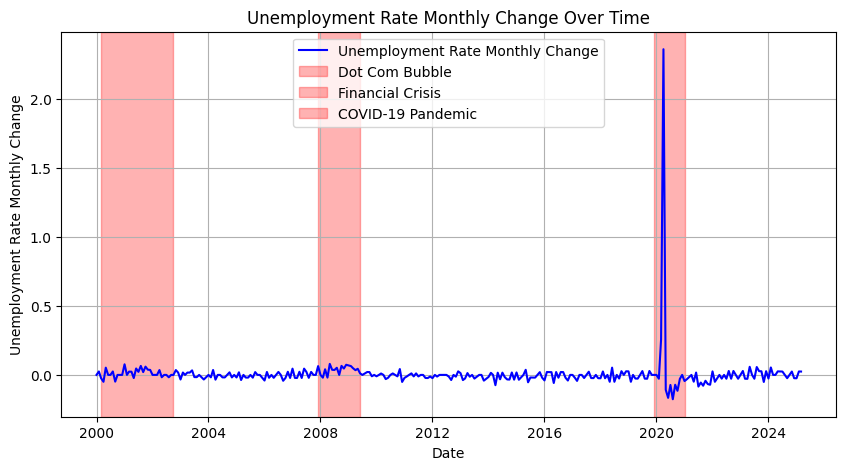

In [292]:
# Now lets look at the unemployment rate
plt.figure(figsize=(10, 5))
plt.plot(UNRATE.index, UNRATE["UNRATE"], label="Unemployment Rate", color="blue")
for label, (start, end) in notable_date_ranges.items():
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.3, label=label)

plt.title("Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate")
plt.legend()
plt.grid()
plt.show()

# Now lets look at the change in unemployment rate
plt.figure(figsize=(10, 5))
plt.plot(UNRATE_monthly_change["DATE"], UNRATE_monthly_change["UNRATE"], label="Unemployment Rate Monthly Change", color="blue")
for label, (start, end) in notable_date_ranges.items():
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.3, label=label)

plt.title("Unemployment Rate Monthly Change Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate Monthly Change")
plt.legend()
plt.grid()
plt.show()

### Notes on Unemployment rate over time.
- Unemployment is VERY visibly tied to recession time periods. Recession --> high unemplyment rate.
- In terms of monthly changes, we want to look for consistent negative changes. However I think we should focus directly on the Unemployment Rate, instead of the change month over month. The change seems a layer too far abstracted to hold enough information.

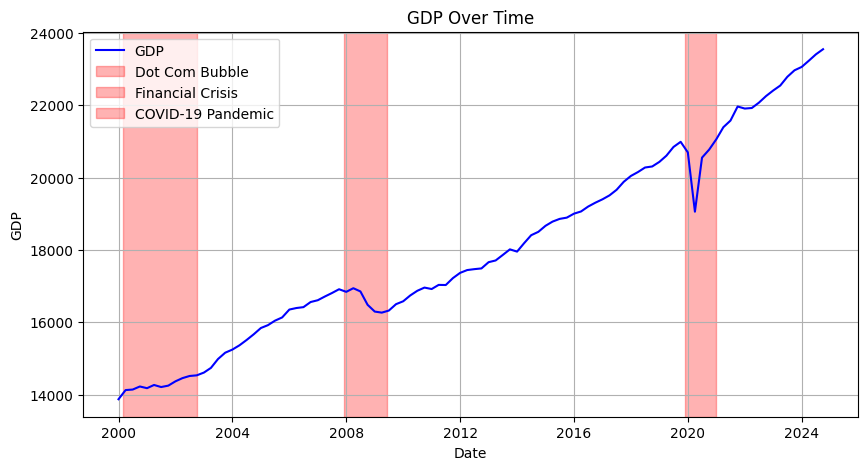

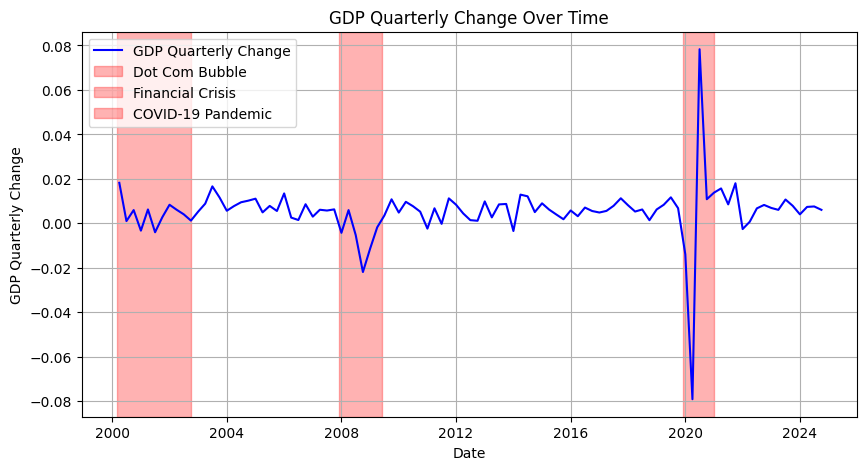

In [293]:
# Now lets look at the GDP
plt.figure(figsize=(10, 5))
plt.plot(GDP.index, GDP["GDPC1"], label="GDP", color="blue")
for label, (start, end) in notable_date_ranges.items():
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.3, label=label)

plt.title("GDP Over Time")
plt.xlabel("Date")
plt.ylabel("GDP")
plt.legend()
plt.grid()
plt.show()

# Now lets look at the change in GDP
plt.figure(figsize=(10, 5))
plt.plot(GDP_quarterly_change["DATE"], GDP_quarterly_change["GDP"], label="GDP Quarterly Change", color="blue")
for label, (start, end) in notable_date_ranges.items():
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.3, label=label)

plt.title("GDP Quarterly Change Over Time")
plt.xlabel("Date")
plt.ylabel("GDP Quarterly Change")
plt.legend()
plt.grid()
plt.show()

### Notes on GDP:
- GDP is also closely tied to recessionary periods (as expected by definition). We want to look for consecutive quarters of negative GDP change.

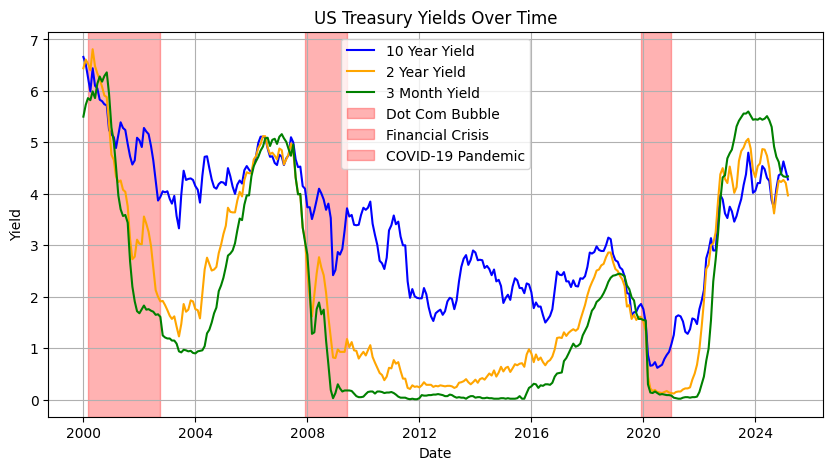

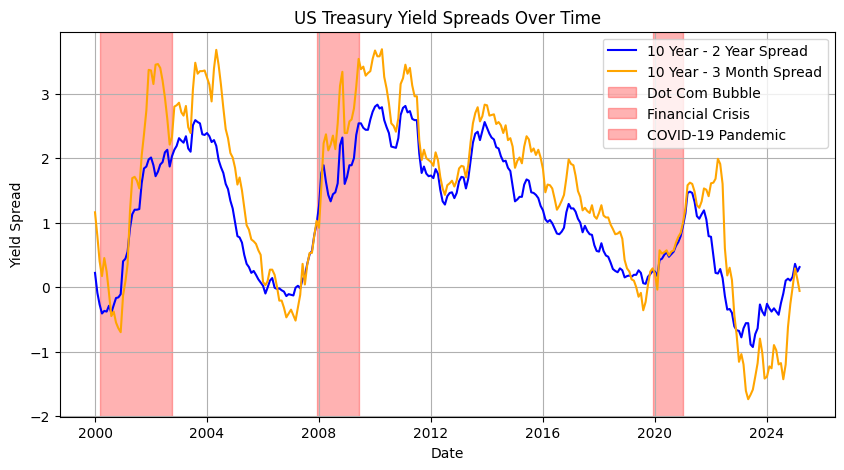

In [294]:
# Now Let's move into the yield spreads.

TenYear = pd.read_csv("GS10.csv", parse_dates=["DATE"]) # 10 Year Treasury Yield
TwoYear = pd.read_csv("GS2.csv", parse_dates=["DATE"]) # 2 Year Treasury Yield
ThreeMonth = pd.read_csv("GS3M.csv", parse_dates=["DATE"]) # 3 Month Treasury Yield

# Calculate the spreads (10Y - 2Y and 10Y - 3M)
Ten_Two_Spread = pd.DataFrame({"DATE": TenYear["DATE"], "Ten_Two_Spread": TenYear["GS10"] - TwoYear["GS2"]})
Ten_Two_Spread["DATE"] = pd.to_datetime(Ten_Two_Spread["DATE"])
Ten_Two_Spread.set_index("DATE", inplace=True)

Ten_Three_Spread = pd.DataFrame({"DATE": TenYear["DATE"], "Ten_Three_Spread": TenYear["GS10"] - ThreeMonth["GS3M"]})
Ten_Three_Spread["DATE"] = pd.to_datetime(Ten_Three_Spread["DATE"])
Ten_Three_Spread.set_index("DATE", inplace=True)

# Plotting the yields all on the same graph, with notable date ranges highlighted
plt.figure(figsize=(10, 5))
plt.plot(TenYear["DATE"], TenYear["GS10"], label="10 Year Yield", color="blue")
plt.plot(TwoYear["DATE"], TwoYear["GS2"], label="2 Year Yield", color="orange")
plt.plot(ThreeMonth["DATE"], ThreeMonth["GS3M"], label="3 Month Yield", color="green")
for label, (start, end) in notable_date_ranges.items():
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.3, label=label)

plt.title("US Treasury Yields Over Time")
plt.xlabel("Date")
plt.ylabel("Yield")
plt.legend()
plt.grid()
plt.show() # First graph

# Plotting the spreads (10Y - 2Y and 10Y - 3M) on the same graph, with notable date ranges highlighted
plt.figure(figsize=(10, 5))
plt.plot(Ten_Two_Spread.index, Ten_Two_Spread["Ten_Two_Spread"], label="10 Year - 2 Year Spread", color="blue")
plt.plot(Ten_Three_Spread.index, Ten_Three_Spread["Ten_Three_Spread"], label="10 Year - 3 Month Spread", color="orange")
for label, (start, end) in notable_date_ranges.items():
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.3, label=label)

plt.title("US Treasury Yield Spreads Over Time")
plt.xlabel("Date")
plt.ylabel("Yield Spread")
plt.legend()
plt.grid()
plt.show() # Second graph

### Observations on treasury yields and spreads
- We can notice that as a precursor to all of these recent recessions, the return on 2-year and 3-month treasury securities exceeds that of the return on 10 year securities. 
- Now obviously this isn't "causing" recessions but it is a very clear indicator that recession is coming, and equivalently, if the T-Spread for 10Y-2Y or 10Y-3M treasury securities is negative, that signals recession.
- Looking at the recent numbers with that in mind is extremely worrying because the magnitude of the spread is larger than it was before any of these previous recessions, yet the government has yet to call our situation a recession.
---
### Now we'll examine IC's investment sector's performance during this same time frame.

In [295]:
import yfinance as yf
import datetime
import pandas as pd

# Import sector data from Yahoo Finance
sector_tickers = {
    "Utilities": "XLU",
    "Energy": "XLE",
    "Consumer Discretionary": "XLY",
    "Consumer Staples": "XLP",
    "Industrials": "XLI",
    "Healthcare": "XLV",
    "Financials": "XLF",
    "Technology": "XLK",
    "Real Estate": "XLRE",
    "Communications/Media": "XLC",
    "Fixed Income Proxy": "AGG"
}


start_date = "2000-01-01"
end_date = "2025-03-02" # This is on the 2nd because yfinance uses the end date as exclusive
for sector, ticker in sector_tickers.items():
    # Note that my jupyter Environment is blocking yfinance by firewall, so I ran this code block on a web env.
    continue
    data = yf.download(ticker, start=start_date, end=end_date, progress=False, interval="1mo")
    data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
    data.to_csv(f"SectorData/{ticker}.csv")

In [296]:
# View the head of data for all sectors.

for sector, ticker in sector_tickers.items():
    data = pd.read_csv(f"SectorData/{ticker}.csv", parse_dates=["DATE"])
    print(f"{sector} Data:")
    print(data.head(), "\n")

Utilities Data:
        DATE      Close
0 2000-01-01  11.417317
1 2000-02-01  10.029688
2 2000-03-01  11.042982
3 2000-04-01  11.853545
4 2000-05-01  11.827538 

Energy Data:
        DATE      Close
0 2000-01-01  14.127126
1 2000-02-01  13.529083
2 2000-03-01  15.161618
3 2000-04-01  14.985364
4 2000-05-01  16.745008 

Consumer Discretionary Data:
        DATE      Close
0 2000-01-01  20.298128
1 2000-02-01  19.167219
2 2000-03-01  21.837097
3 2000-04-01  21.424122
4 2000-05-01  20.267628 

Consumer Staples Data:
        DATE      Close
0 2000-01-01  12.740108
1 2000-02-01  11.249339
2 2000-03-01  11.634881
3 2000-04-01  12.291086
4 2000-05-01  13.167791 

Industrials Data:
        DATE      Close
0 2000-01-01  17.266600
1 2000-02-01  16.313959
2 2000-03-01  18.546711
3 2000-04-01  18.853455
4 2000-05-01  18.773901 

Healthcare Data:
        DATE      Close
0 2000-01-01  20.676533
1 2000-02-01  19.324572
2 2000-03-01  21.062811
3 2000-04-01  20.816029
4 2000-05-01  20.258064 

Financia

Something really annoying to note here is that for Real Estate, Communications, and Fixed Income, we don't have data from 2000-01 because these ETFs did not exist during that time. For the scope of this project, we're going to ignore Fixed Income, Communications, and Real Estate. That can be something to add in the future.

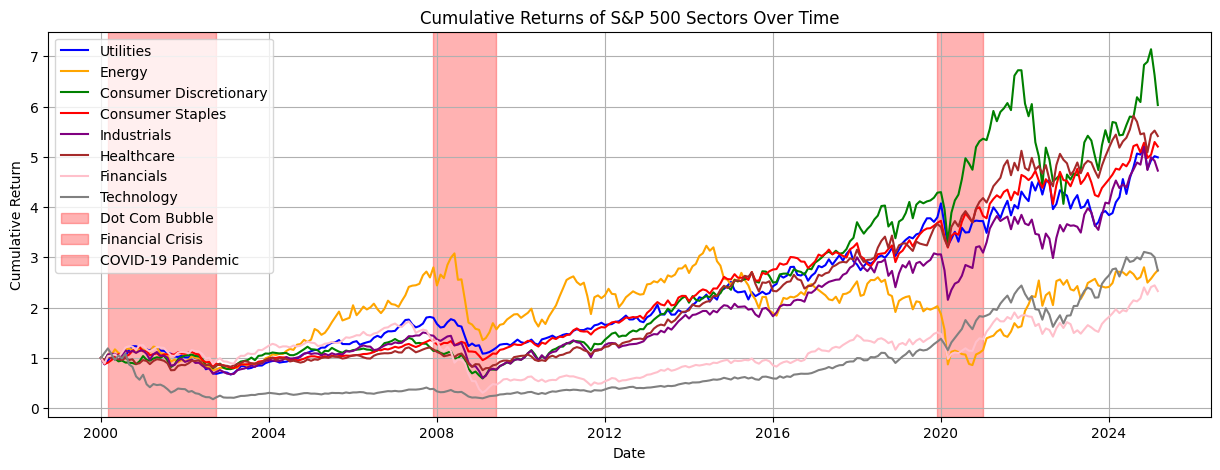

In [297]:
# Now let's get monthly log returns for each sector and plot them.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

included_sectors = {
    "Utilities": "XLU",
    "Energy": "XLE",
    "Consumer Discretionary": "XLY",
    "Consumer Staples": "XLP",
    "Industrials": "XLI",
    "Healthcare": "XLV",
    "Financials": "XLF",
    "Technology": "XLK"
}


sectors_df = pd.DataFrame()
sectors_df["DATE"] = pd.date_range(start="2000-01-01", end="2025-03-01", freq="MS")
sectors_df.set_index("DATE", inplace=True)
for sector, ticker in included_sectors.items():
    data = pd.read_csv(f"SectorData/{ticker}.csv", parse_dates=["DATE"])
    data.set_index("DATE", inplace=True)
    data.rename(columns={"Close": f"{ticker} Close"}, inplace=True)
    sectors_df = pd.merge(sectors_df, data, left_index=True, right_index=True, how="outer")
    sectors_df[f"{ticker} Log Return"] = np.log(sectors_df[f"{ticker} Close"] / sectors_df[f"{ticker} Close"].shift(1))

# Replace all NaN values with 0
sectors_df.fillna(0, inplace=True)

sectors_df.head()

# Now lets plot cumulative returns for each sector
plt.figure(figsize=(15, 5))
plt.plot(sectors_df.index, (sectors_df["XLU Log Return"] + 1).cumprod(), label="Utilities", color="blue")
plt.plot(sectors_df.index, (sectors_df["XLE Log Return"] + 1).cumprod(), label="Energy", color="orange")
plt.plot(sectors_df.index, (sectors_df["XLY Log Return"] + 1).cumprod(), label="Consumer Discretionary", color="green")
plt.plot(sectors_df.index, (sectors_df["XLP Log Return"] + 1).cumprod(), label="Consumer Staples", color="red")
plt.plot(sectors_df.index, (sectors_df["XLI Log Return"] + 1).cumprod(), label="Industrials", color="purple")
plt.plot(sectors_df.index, (sectors_df["XLV Log Return"] + 1).cumprod(), label="Healthcare", color="brown")
plt.plot(sectors_df.index, (sectors_df["XLF Log Return"] + 1).cumprod(), label="Financials", color="pink")
plt.plot(sectors_df.index, (sectors_df["XLK Log Return"] + 1).cumprod(), label="Technology", color="gray")


# Highlight notable date ranges
for label, (start, end) in notable_date_ranges.items():
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.3, label=label)

plt.title("Cumulative Returns of S&P 500 Sectors Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid()
plt.show()


### Very clear trend here that sectors get affected a lot during these recessions and bearing regimes...
- But what's interesting is that some industries are affected much less than others, like Consumer Staples and Technology.
- It's also clear that certain industries have stronger correlations with one another, and also certain regimes have their own respective bear runs over time. Let's look at the correlation matrix bettween the monthly log returns.

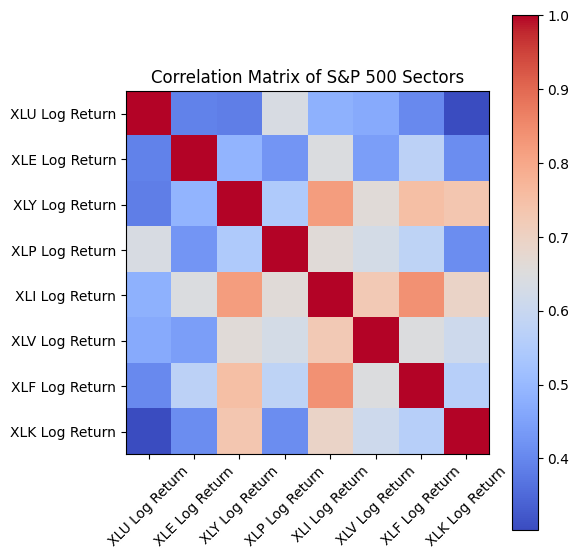

                XLU Log Return  XLE Log Return  XLY Log Return  \
XLU Log Return        1.000000        0.390553        0.385950   
XLE Log Return        0.390553        1.000000        0.488225   
XLY Log Return        0.385950        0.488225        1.000000   
XLP Log Return        0.635788        0.426795        0.547060   
XLI Log Return        0.481279        0.645161        0.817967   
XLV Log Return        0.467928        0.443106        0.659691   
XLF Log Return        0.406246        0.573522        0.752215   
XLK Log Return        0.303042        0.409326        0.731062   

                XLP Log Return  XLI Log Return  XLV Log Return  \
XLU Log Return        0.635788        0.481279        0.467928   
XLE Log Return        0.426795        0.645161        0.443106   
XLY Log Return        0.547060        0.817967        0.659691   
XLP Log Return        1.000000        0.660624        0.628798   
XLI Log Return        0.660624        1.000000        0.724936   
XLV Log R

In [298]:
# Correlation matrix of the sectors
log_returns = sectors_df[[f"{ticker} Log Return" for ticker in included_sectors.values()]].copy()
correlation_matrix = log_returns.corr()

# Plotting the correlation matrix with labels
plt.figure(figsize=(6, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index)
plt.title("Correlation Matrix of S&P 500 Sectors")
plt.tight_layout()
plt.show()

print(correlation_matrix)


### Important notes: 
- Cyclicals sectors (energy, financials, industrials) move together. Industrials have the strongest correlations (XLI–XLF: 0.84, XLI–XLY: 0.82), signaling that sector movements and activities (news sentiment etc.) can cause mutual sensitivity to economic growth and monetary cycles.

- Utilities (XLU) consistently show the lowest correlation with other sectors (XLU–XLK: 0.30), underscoring their role as a defensive hedge in macro-stressed regimes (especially right now).

- These relationships likely vary across monetary regimes (ie fed tightening vs easing), making regime-based correlation analysis a critical input for adaptive sector allocation.

---
# Our goal now is to use our macro and overall market data to develop a Hidden Markov Model to identify and classify 4 Regimes.
- This will include, data preprocessing and parameter selection (% changes in CPI, log returns of SPY, Volatility, etc), model selection (I'm inclined to use a Hidden Semi-Markov Model for more robust modeling), and execution (classify).

### We're going to begin with developing our dataframe. We want to use the following data points:
- SPY Monthly Returns and Volatility (NOTE that our data for SPY is on a daily time frame, we will convert to monthly returns and monthly vol)
- CPI MoM % Changes
- Core (w/o food and energy) CPI MoM % Changes
- Unemployment rate
- GDP MoM % Changes (Note that GDP data is quarterly, so we will develop a monthly effective growth rate)
- 10Y-2Y Treasury Yield Spread
- 10Y-3M Treasury Yield Spread
- Fed Funds Rate (not analyzed earlier)

We will need to normalize our data to prevent and avoid scale dominance. Todo this we will use Z-scores.

In [299]:
# Let's develop our training matrix.
HMM_data = pd.DataFrame()
HMM_data["DATE"] = pd.date_range(start="2000-01-01", end="2025-03-01", freq="MS")
HMM_data.set_index("DATE", inplace=True)

# Import the SPY.csv close daily data. We will compute the log returns and then take the monthly accumulated.
SPY = pd.read_csv("SPY.csv", parse_dates=["DATE"])
SPY.set_index("DATE", inplace=True)
SPY["log_returns"] = np.log(SPY["Close"] / SPY["Close"].shift(1))
SPY["log_returns"] = SPY["log_returns"].fillna(0)

# Now we will take the monthly accumulated log returns and add them to the HMM_data dataframe.
# Note that to get monthy returns, we add log returns from the PREVIOUS month. 
# We can use resample to sum the log returns for each month, and then shift the scale to get the actual accumulated returns from the previous month.
# We will need to fill 2000-01-01 with 0, as we don't have data from december 1999
monthly_returns = SPY["log_returns"].resample("MS").sum()
monthly_returns = monthly_returns.shift(1) # Shift to get the previous month returns
monthly_returns = monthly_returns.reindex(HMM_data.index, method="ffill") # Reindex to match the HMM_data index


HMM_data["SPY Log Return"] = monthly_returns
HMM_data["SPY Log Return"] = HMM_data["SPY Log Return"].fillna(0)

# Now we add SPY volatility of the previous month to the HMM_data dataframe.
SPY["rolling_vol"] = SPY["log_returns"].rolling(window=21).std()

# Resample to month-end and take last rolling volatility value each month
monthly_vol = SPY["rolling_vol"].resample("ME").last()

# Shift it forward so Jan volatility shows up under Feb 1
monthly_vol.index = monthly_vol.index + pd.DateOffset(days=1)
monthly_vol.index = monthly_vol.index.to_period("M").to_timestamp()


HMM_data["SPY Realized Vol"] = monthly_vol
HMM_data["SPY Realized Vol"] = HMM_data["SPY Realized Vol"].bfill() # Back fill volatility, because volatility is Temporal and Persistent
HMM_data

,SPY Log Return,SPY Realized Vol
DATE,,
2000-01-01,0.000000,0.014287
2000-02-01,-0.041234,0.014287
2000-03-01,-0.015344,0.014287
2000-04-01,0.092502,0.016857
2000-05-01,-0.035752,0.021163
...,...,...
2024-11-01,-0.008964,0.007102
2024-12-01,0.057923,0.008786
2025-01-01,-0.024354,0.009084


In [300]:
# Now that our SPY data is in, let's add Macro data.
# - CPI MoM % Changes                                CHECK
# - Core (w/o food and energy) CPI MoM % Changes     CHECK
# - Unemployment rate                                CHECK
# - GDP MoM % Changes (Note GDP data is quarterly)   CHECK
# - 10Y-2Y Treasury Yield Spread                     CHECK
# - 10Y-3M Treasury Yield Spread                     CHECK
# - Fed Funds Rate (not analyzed earlier)            CHECK

# Force all macro series to use month-start timestamps (we were getting index errors before)
CPIAUCNS_monthly_change.index = CPIAUCNS_monthly_change.index.to_period("M").to_timestamp()
CPILFESL_monthly_change.index = CPILFESL_monthly_change.index.to_period("M").to_timestamp()
UNRATE.index = UNRATE.index.to_period("M").to_timestamp()
Ten_Two_Spread.index = Ten_Two_Spread.index.to_period("M").to_timestamp()
Ten_Three_Spread.index = Ten_Three_Spread.index.to_period("M").to_timestamp()
FEDFUNDS.index = FEDFUNDS.index.to_period("M").to_timestamp()

HMM_data["CPI_MoM"] = CPIAUCNS_monthly_change["CPIAUCNS"]
HMM_data["Core_CPI_MoM"] = CPILFESL_monthly_change["CPILFESL"]
HMM_data["Unemployment_Rate"] = UNRATE["UNRATE"]
HMM_data["10Y-2Y_Spread"] = Ten_Two_Spread["Ten_Two_Spread"]
HMM_data["10Y-3M_Spread"] = Ten_Three_Spread["Ten_Three_Spread"]
HMM_data["Fed_Funds_Rate"] = FEDFUNDS["FEDFUNDS"]

# GDP is quarterly, so we need to convert it to monthly effective.
GDP["GDP_Growth_QoQ"] = GDP["GDPC1"].pct_change()
GDP["GDP_Growth_QoQ"] = GDP["GDP_Growth_QoQ"].fillna(0)
GDP["GDP_Growth_MonthlyEffective"] = (1 + GDP["GDP_Growth_QoQ"]) ** (1/3) - 1

HMM_data["GDP_MoM"] = GDP["GDP_Growth_MonthlyEffective"]
HMM_data["GDP_MoM"] = HMM_data["GDP_MoM"].ffill() # Note that for the most recent quarter we don't have data, so this will also be FFILLed

HMM_data.to_csv("HMM_data.csv") # Save the data to a csv file
HMM_data

,SPY Log Return,SPY Realized Vol,CPI_MoM,Core_CPI_MoM,Unemployment_Rate,10Y-2Y_Spread,10Y-3M_Spread,Fed_Funds_Rate,GDP_MoM
DATE,,,,,,,,,
2000-01-01,0.000000,0.014287,0.000000,0.000000,4.0,0.22,1.16,5.45,0.000000
2000-02-01,-0.041234,0.014287,0.005924,0.000558,4.1,-0.09,0.79,5.73,0.000000
2000-03-01,-0.015344,0.014287,0.008245,0.003344,4.0,-0.27,0.40,5.85,0.000000
2000-04-01,0.092502,0.016857,0.000584,0.001667,3.8,-0.41,0.17,6.02,0.006034
2000-05-01,-0.035752,0.021163,0.001168,0.002219,4.0,-0.37,0.45,6.27,0.006034
...,...,...,...,...,...,...,...,...,...
2024-11-01,-0.008964,0.007102,-0.000542,0.002894,4.2,0.10,-0.26,4.64,0.002019
2024-12-01,0.057923,0.008786,0.000355,0.002098,4.1,0.16,0.00,4.48,0.002019
2025-01-01,-0.024354,0.009084,0.006546,0.004463,4.0,0.36,0.29,4.33,0.002019


### Now that we have this data for our Hidden Markov Model Regime Classifier, we have to normalize it.

In [301]:
HMM_data_scaled = HMM_data.copy()
# Scale the data z-score
HMM_data_scaled["SPY Log Return"] = (HMM_data_scaled["SPY Log Return"] - HMM_data_scaled["SPY Log Return"].mean()) / HMM_data_scaled["SPY Log Return"].std()
HMM_data_scaled["SPY Realized Vol"] = (HMM_data_scaled["SPY Realized Vol"] - HMM_data_scaled["SPY Realized Vol"].mean()) / HMM_data_scaled["SPY Realized Vol"].std()
HMM_data_scaled["CPI_MoM"] = (HMM_data_scaled["CPI_MoM"] - HMM_data_scaled["CPI_MoM"].mean()) / HMM_data_scaled["CPI_MoM"].std()
HMM_data_scaled["Core_CPI_MoM"] = (HMM_data_scaled["Core_CPI_MoM"] - HMM_data_scaled["Core_CPI_MoM"].mean()) / HMM_data_scaled["Core_CPI_MoM"].std()
HMM_data_scaled["Unemployment_Rate"] = (HMM_data_scaled["Unemployment_Rate"] - HMM_data_scaled["Unemployment_Rate"].mean()) / HMM_data_scaled["Unemployment_Rate"].std()
HMM_data_scaled["GDP_MoM"] = (HMM_data_scaled["GDP_MoM"] - HMM_data_scaled["GDP_MoM"].mean()) / HMM_data_scaled["GDP_MoM"].std()
HMM_data_scaled["10Y-2Y_Spread"] = (HMM_data_scaled["10Y-2Y_Spread"] - HMM_data_scaled["10Y-2Y_Spread"].mean()) / HMM_data_scaled["10Y-2Y_Spread"].std()
HMM_data_scaled["10Y-3M_Spread"] = (HMM_data_scaled["10Y-3M_Spread"] - HMM_data_scaled["10Y-3M_Spread"].mean()) / HMM_data_scaled["10Y-3M_Spread"].std()
HMM_data_scaled["Fed_Funds_Rate"] = (HMM_data_scaled["Fed_Funds_Rate"] - HMM_data_scaled["Fed_Funds_Rate"].mean()) / HMM_data_scaled["Fed_Funds_Rate"].std()

HMM_data_scaled.to_csv("HMM_data_scaled.csv") # Save the scaled data to a csv file
HMM_data_scaled

,SPY Log Return,SPY Realized Vol,CPI_MoM,Core_CPI_MoM,Unemployment_Rate,10Y-2Y_Spread,10Y-3M_Spread,Fed_Funds_Rate,GDP_MoM
DATE,,,,,,,,,
2000-01-01,-0.141677,0.612472,-0.553958,-1.436617,-0.858184,-0.874991,-0.191987,1.730464,-0.420929
2000-02-01,-1.074694,0.612472,0.995243,-1.030410,-0.807098,-1.191183,-0.467226,1.868643,-0.420929
2000-03-01,-0.488861,0.612472,1.602150,0.999266,-0.858184,-1.374778,-0.757342,1.927863,-0.420929
2000-04-01,1.951395,1.002135,-0.401210,-0.222735,-0.960357,-1.517575,-0.928437,2.011758,1.010434
2000-05-01,-0.950653,1.655117,-0.248640,0.179199,-0.858184,-1.476776,-0.720148,2.135132,1.010434
...,...,...,...,...,...,...,...,...,...
2024-11-01,-0.344499,-0.477104,-0.695620,0.671246,-0.756011,-0.997388,-1.248309,1.330732,0.058084
2024-12-01,1.168972,-0.221620,-0.461124,0.091746,-0.807098,-0.936189,-1.054898,1.251772,0.058084
2025-01-01,-0.692752,-0.176522,1.157896,1.814208,-0.858184,-0.732194,-0.839170,1.177748,0.058084


In [319]:
# We're going to use hmmlearn to train a Gaussian Hidden Markov Model on the data.
from hmmlearn.hmm import GaussianHMM

model = GaussianHMM(n_components=4, covariance_type="full", n_iter=1000, random_state=42)
model.fit(HMM_data_scaled)

print(model.means_)
print(model.transmat_)
model.predict(HMM_data_scaled)

[[ 0.0846961  -0.32608633  0.0683647   0.24208517 -0.25938414  0.04826833
   0.12954894 -0.702894    0.26501828]
 [-0.00735188 -0.12206401  0.12547473  0.1120792  -0.51360032 -0.50654546
  -0.4796091   0.98951821  0.07341732]
 [-1.34431087  4.21626043 -2.33184911 -1.86513135  2.1729429   0.19258343
   0.24442752 -0.81927012 -4.50561012]
 [ 0.01259182  0.23305456 -0.08750144 -0.2934634   0.86012865  0.65144584
   0.51983613 -0.56927531 -0.07606462]]
[[9.67741149e-01 1.38191585e-56 1.07437044e-02 2.15151471e-02]
 [7.48819802e-75 9.83116679e-01 5.71406061e-86 1.68833208e-02]
 [1.66666672e-01 0.00000000e+00 6.66666667e-01 1.66666661e-01]
 [2.37483620e-02 2.37451899e-02 1.18588723e-02 9.40647576e-01]]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,